In [4]:
import sys,os
# sys.path
sys.path.append(os.path.join(os.getcwd(),"tf_unet"))
sys.path

['c:\\users\\ayushmaan\\anaconda3\\envs\\tf2\\python36.zip',
 'c:\\users\\ayushmaan\\anaconda3\\envs\\tf2\\DLLs',
 'c:\\users\\ayushmaan\\anaconda3\\envs\\tf2\\lib',
 'c:\\users\\ayushmaan\\anaconda3\\envs\\tf2',
 '',
 'c:\\users\\ayushmaan\\anaconda3\\envs\\tf2\\lib\\site-packages',
 'c:\\users\\ayushmaan\\anaconda3\\envs\\tf2\\lib\\site-packages\\win32',
 'c:\\users\\ayushmaan\\anaconda3\\envs\\tf2\\lib\\site-packages\\win32\\lib',
 'c:\\users\\ayushmaan\\anaconda3\\envs\\tf2\\lib\\site-packages\\Pythonwin',
 'c:\\users\\ayushmaan\\anaconda3\\envs\\tf2\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Ayushmaan\\.ipython',
 'D:\\Desktop\\UCL\\Coursework\\ThirdYear\\Group Research Project\\dlip-project-cs31\\tf_unet']

In [5]:
import sys
sys.path
import tensorflow as tf
import numpy as np
import os
from skimage.io import imread
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [6]:
def pretty_print(data, n=9):
    plt.figure(figsize=(2 * n, 2))
    for i in range(1, n+1):
        ax = plt.subplot(1, n, i)
        plt.imshow(data[i].reshape(image_dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [7]:
folder_path = "phantoms"
num_samples = 100
image_dims = (128, 128)
image_dims_large = (572,572)

In [8]:
def pretty_print(data, n=9):
    plt.figure(figsize=(2 * n, 2))
    for i in range(1, n+1):
        ax = plt.subplot(1, n, i)
        plt.imshow(data[i].reshape(image_dims))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()



(128, 128, 1)


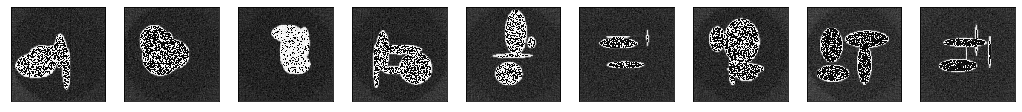

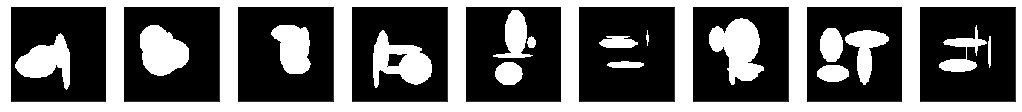

In [9]:
x = np.ndarray((num_samples, image_dims[0], image_dims[1]))
y = np.ndarray((num_samples, image_dims[0], image_dims[1]))
for i in range(num_samples):
    x[i] = imread("{}/f_fbp/{}.tif".format(folder_path, i))
    y[i] = imread("{}/f_true/{}.tif".format(folder_path, i))
    
# Normalize values
x = x.astype('float32') / 255.
y = y.astype('float32') / 255.

# Desired shape for keras is (n_samples, x, y, n_channels)
x = np.reshape(x, (len(x), image_dims[0], image_dims[1], 1))
y = np.reshape(y, (len(y), image_dims[0], image_dims[1], 1))

x_train_fbp, x_test_fbp, y_train_fbp, y_test_fbp = train_test_split(x, y, test_size=0.1, random_state=42)
print(x_train_fbp[0].shape)
y_train_fbp.shape

y_test_fbp.shape

pretty_print(x_test_fbp)

pretty_print(y_test_fbp)

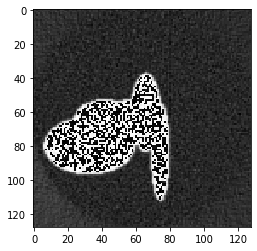

In [52]:
plt.imshow(x_test_fbp[1].reshape(image_dims))
plt.gray()
# plt.get_xaxis().set_visible(False)
# plt.get_yaxis().set_visible(False)
plt.show()

In [10]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['image.cmap'] = 'gist_earth'
np.random.seed(98765)

In [11]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util

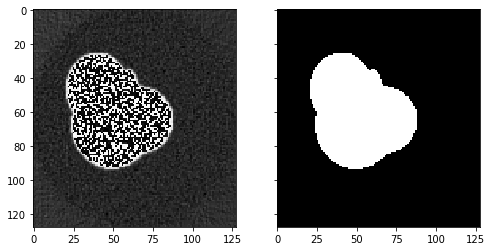

In [16]:
nx = 572
ny = 572

generator = image_gen.GrayScaleDataProvider(nx, ny, cnt=20)

x_test, y_test = generator(1)

x_test.shape

fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
plt.gray()
ax[0].imshow(x_test_fbp[2,...,0],aspect="auto")
ax[1].imshow(y_test_fbp[2,...,0], aspect="auto")

In [17]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=16)
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

2020-03-24 18:06:38,345 Layers 3, features 16, filter size 3x3, pool size: 2x2


In [ ]:
path = trainer.train(generator, "./unet_trained", training_iters=10, epochs=5, display_step=2)

2020-03-24 18:06:49,029 Removing 'D:\Desktop\UCL\Coursework\ThirdYear\Group Research Project\dlip-project-cs31\prediction'
2020-03-24 18:06:49,031 Removing 'D:\Desktop\UCL\Coursework\ThirdYear\Group Research Project\dlip-project-cs31\unet_trained'
2020-03-24 18:06:49,031 Allocating 'D:\Desktop\UCL\Coursework\ThirdYear\Group Research Project\dlip-project-cs31\prediction'
2020-03-24 18:06:49,035 Allocating 'D:\Desktop\UCL\Coursework\ThirdYear\Group Research Project\dlip-project-cs31\unet_trained'
2020-03-24 18:07:10,421 Verification error= 28.4%, loss= 0.6878
2020-03-24 18:07:18,502 Start optimization
2020-03-24 18:07:32,474 Iter 0, Minibatch Loss= 0.6262, Training Accuracy= 0.8146, Minibatch error= 18.5%
2020-03-24 18:07:54,474 Iter 2, Minibatch Loss= 0.5220, Training Accuracy= 0.8623, Minibatch error= 13.8%
2020-03-24 18:08:17,084 Iter 4, Minibatch Loss= 0.4412, Training Accuracy= 0.8612, Minibatch error= 13.9%
2020-03-24 18:08:38,833 Iter 6, Minibatch Loss= 0.5172, Training Accuracy= 

In [ ]:
x_test, y_test = generator(1)
print(x_test.shape)
prediction = net.predict("./unet_trained/model.ckpt", x_test)
prediction_fbp = net.predict("./unet_trained/model.ckpt", x_test_fbp)

prediction_fbp[1].shape

# fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
# plt.gray()
# ax[0].imshow(x_test[0,...,0], aspect="auto")
# ax[1].imshow(y_test[0,...,0], aspect="auto")
# mask = prediction[0,...,0] > 0.9
# ax[2].imshow(mask, aspect="auto")
# ax[0].set_title("Input")
# ax[1].set_title("Ground truth")
# ax[2].set_title("Prediction")
# fig.tight_layout()
# fig.savefig("../docs/toy_problem.png")
# pretty_print(prediction)

# pretty_print_large(pred2)

fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
plt.gray()
ax[0].imshow(x_test_fbp[1,...,0].reshape((128,128)), aspect="auto")
ax[1].imshow(y_test_fbp[1,...,0].reshape((128,128)), aspect="auto")
mask = prediction_fbp[1,...,0] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
# fig.tight_layout()